In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Simul import get_m1_m2,get_RQ_MOA,get_R_simul,get_RQ_MOA2,get_R_simul_wf,get_R_simul_wf2,RK4_ZZ2,Kuramoto_MF_CHIMERA,gen_dist2
from Simul import dZ2_dt,RK4,to_complex,dZ_dt,get_R_simul_wfT
from parfor import parfor

from tqdm.notebook import tqdm
from parfor import parfor

In [177]:
alpha = 1.0
beta = 0.5
eta1 = 0.1
eta2 = 0.0
shift = 0
N = 50000

In [184]:
t_end = 1
R1,R2,Q1,Q2,t = get_RQ_MOA(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_2,R2_2,Q1_2,Q2_2,_ = get_RQ_MOA2(1,0.6,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end)
R1_s,R2_s,Q1_s,Q2_s,t,thetas = get_R_simul_wfT(1.,0.6,N,alpha=alpha,beta=beta,eta1=eta1,eta2=eta2,shift=shift,t_end=t_end,seed=1)

In [179]:
fc = np.fft.fft(thetas[:,N:],axis=1)
# thetas[:,N:].shape

In [172]:
np.abs(np.sum(fc[0][1::2]))

7846.912343574867

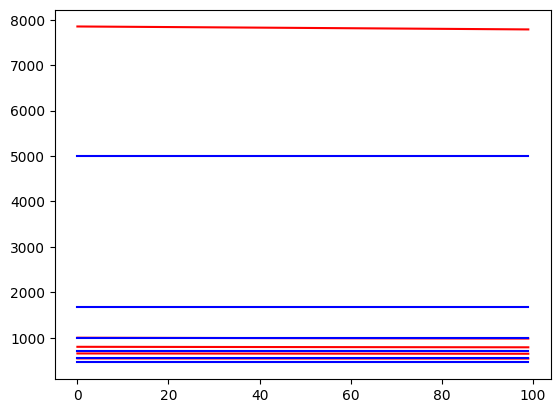

In [173]:
plt.plot(np.abs(fc[:,0]),color='red')
plt.plot(np.abs(fc[:,2]),color='red')
plt.plot(np.abs(fc[:,4]),color='red')
plt.plot(np.abs(fc[:,6]),color='red')
plt.plot(np.abs(fc[:,8]),color='red')

plt.plot(np.abs(fc[:,1]),color='blue')
plt.plot(np.abs(fc[:,3]),color='blue')
plt.plot(np.abs(fc[:,5]),color='blue')
plt.plot(np.abs(fc[:,7]),color='blue')
plt.plot(np.abs(fc[:,9]),color='blue')
plt.plot(np.abs(fc[:,11]),color='blue')


# plt.ylim(0,1)

In [185]:
# RS = thetas[0,N:]
RandomS = thetas[0,N:]

Text(0, 0.5, 'count')

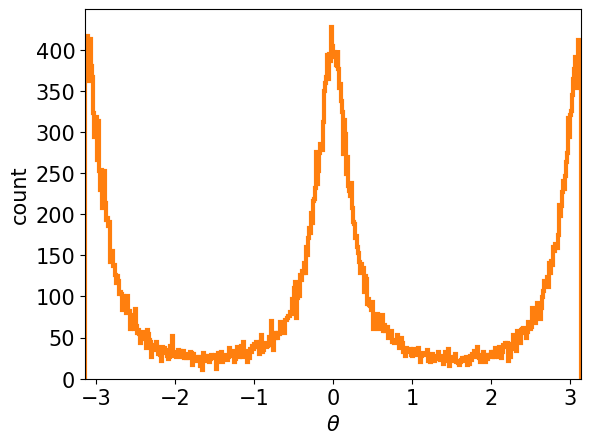

In [193]:
bins = np.linspace(-np.pi,np.pi,500)
# plt.hist((RS+np.pi)%(2*np.pi)-np.pi,bins=bins,histtype='step',label='t=0',lw=3);
plt.hist((RandomS+np.pi)%(2*np.pi)-np.pi,bins=bins,histtype='step',label='t=0',lw=3,color='tab:orange');
# plt.hist((thetas[-1,N:]+np.pi)%(2*np.pi)-np.pi,bins=bins,histtype='step',label='t=5,000');
# plt.legend()
plt.xlim(-np.pi,np.pi)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'$\theta$',fontsize=15)
plt.ylabel(r'count',fontsize=15)

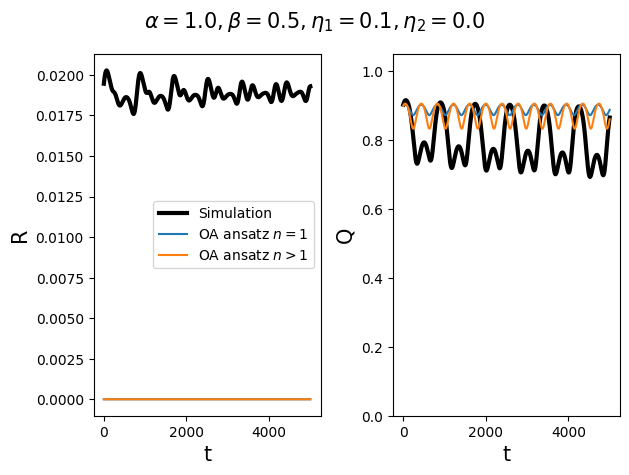

In [ ]:
plt.subplot(121)
plt.plot(t,R2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,R2,label=r'OA ansatz $n=1$')
plt.plot(t,R2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
plt.legend()
plt.ylabel('R',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
# plt.title(rf'$\alpha={alpha},\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
# plt.ylim(0.5,1.05)

plt.subplot(122)
plt.plot(t,Q2_s,label='Simulation',color='black',lw=3,zorder=0)
plt.plot(t,Q2,label=r'OA ansatz $n=1$')
plt.plot(t,Q2_2,label='OA ansatz $n>1$')

# plt.plot(t,(Q2s + Q2s2)/2,label='modified OA ansatz 1')
# plt.plot(t,,label='modified OA ansatz 2')
# plt.legend()
plt.ylabel('Q',fontsize=15)
plt.xlabel('t',fontsize=15)
# for a in nums:
    # plt.plot(t_,Q2_S[a])
plt.suptitle(rf'$\alpha={alpha},\beta={beta},\eta_1 = {eta1},\eta_2 = {eta2}$',fontsize=15)
# plt.xlim(0,3000)
plt.ylim(0.0,1.05)
plt.tight_layout()

In [43]:
N1 = N2 = N
A1 = np.sqrt(1)
A2 = np.sqrt(0.6)
a1 =  A1 *np.exp(0j)
b1 =  a1 * np.exp(np.pi*1j)
a2 =  A2*np.exp(shift*1j)
b2 =  a2* np.exp(np.pi*1j)
T1 = np.r_[np.zeros(int((1/2 + eta1/2)*N)),np.pi* np.ones(N - int((1/2 + eta1/2)*N))]
T2 = gen_dist2(N,a2,b2,eta2)
Theta = np.r_[T1,T2]
t = np.arange(0,20000,0.1)

In [207]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,50)


R1s = []
R2s = []
Q1s = []
Q2s = []

for beta in tqdm(betas):
    @parfor(alphas,args=(beta,),bar=False)
    def ParFOR(alpha,beta):
        (Z1as,Z1bs,Z2as,Z2bs) = RK4_ZZ2(Kuramoto_MF_CHIMERA,Theta.copy(),t,args=(N1,N2,beta,alpha,K))
        Q2 = np.abs(Z2bs)[::1000]
        
        return Q2
    Q2 = ParFOR
    # R1s.append(R1)
    # R2s.append(R2)
    # Q1s.append(Q1)
    Q2s.append(Q2)
Q2s = np.array(Q2s)
np.savez(f'N={N},eta1={eta1},eta2={eta2}',Q2s=Q2s,eta1=eta1,eta2=eta2)


  0%|          | 0/50 [00:00<?, ?it/s]

# OA2 Manifold

In [208]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,50)


Q2s_OA2 = []
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2),bar=False)
    def get_QR_long(alpha,beta,eta1,eta2):
        Zs = RK4(dZ2_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))
        a1s,b1s,a2s,b2s = to_complex(Zs[::1000])
        # RZ1s = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
        # QZ1s = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)

        # RZ2s = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
        QZ2s = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)
        return np.abs(QZ2s)#,a1s,b1s,a2s,b2s
    
    # RZ1,QZ1,RZ2,QZ2,a1s,b1s,a2s,b2s = zip(*get_QR_long)
    Q2 = get_QR_long
    Q2s_OA2.append(Q2)
Q2s_OA2 = np.array(Q2s_OA2)
np.savez(f'OA2,eta1={eta1},eta2={eta2}',Q2s=Q2s_OA2,eta1=eta1,eta2=eta2)

  0%|          | 0/50 [00:00<?, ?it/s]

# OA1 Manifold

In [209]:
N1,N2 = N,N
K = 1
alphas = np.linspace(0,np.pi/2,50)
betas = np.linspace(0,1,50)


Q2s_OA1 = []
for beta in tqdm(betas):
    @parfor(alphas,args=(beta,eta1,eta2),bar=False)
    def get_QR_long(alpha,beta,eta1,eta2):
        Zs = RK4(dZ_dt,np.array([a1.real,a1.imag,b1.real,b1.imag,a2.real,a2.imag,b2.real,b2.imag]),t,args=(alpha,beta,eta1,eta2))
        a1s,b1s,a2s,b2s = to_complex(Zs[::1000])
        # RZ1s = 1/2 * (np.conj(a1s)+np.conj(b1s)) + eta1/2 * (np.conj(a1s)-np.conj(b1s))
        # QZ1s = 1/2 * (np.conj(a1s)**2+np.conj(b1s)**2) + eta1/2 * (np.conj(a1s)**2-np.conj(b1s)**2)

        # RZ2s = 1/2 * (np.conj(a2s)+np.conj(b2s)) + eta2/2 * (np.conj(a2s)-np.conj(b2s))
        QZ2s = 1/2 * (np.conj(a2s)**2+np.conj(b2s)**2) + eta2/2 * (np.conj(a2s)**2-np.conj(b2s)**2)
        return np.abs(QZ2s)#,a1s,b1s,a2s,b2s
    
    # RZ1,QZ1,RZ2,QZ2,a1s,b1s,a2s,b2s = zip(*get_QR_long)
    Q2 = get_QR_long
    Q2s_OA1.append(Q2)
Q2s_OA1 = np.array(Q2s_OA1)
np.savez(f'OA1,eta1={eta1},eta2={eta2}',Q2s=Q2s_OA1,eta1=eta1,eta2=eta2)


  0%|          | 0/50 [00:00<?, ?it/s]

In [210]:
t_temp = t[::1000]

# simul

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

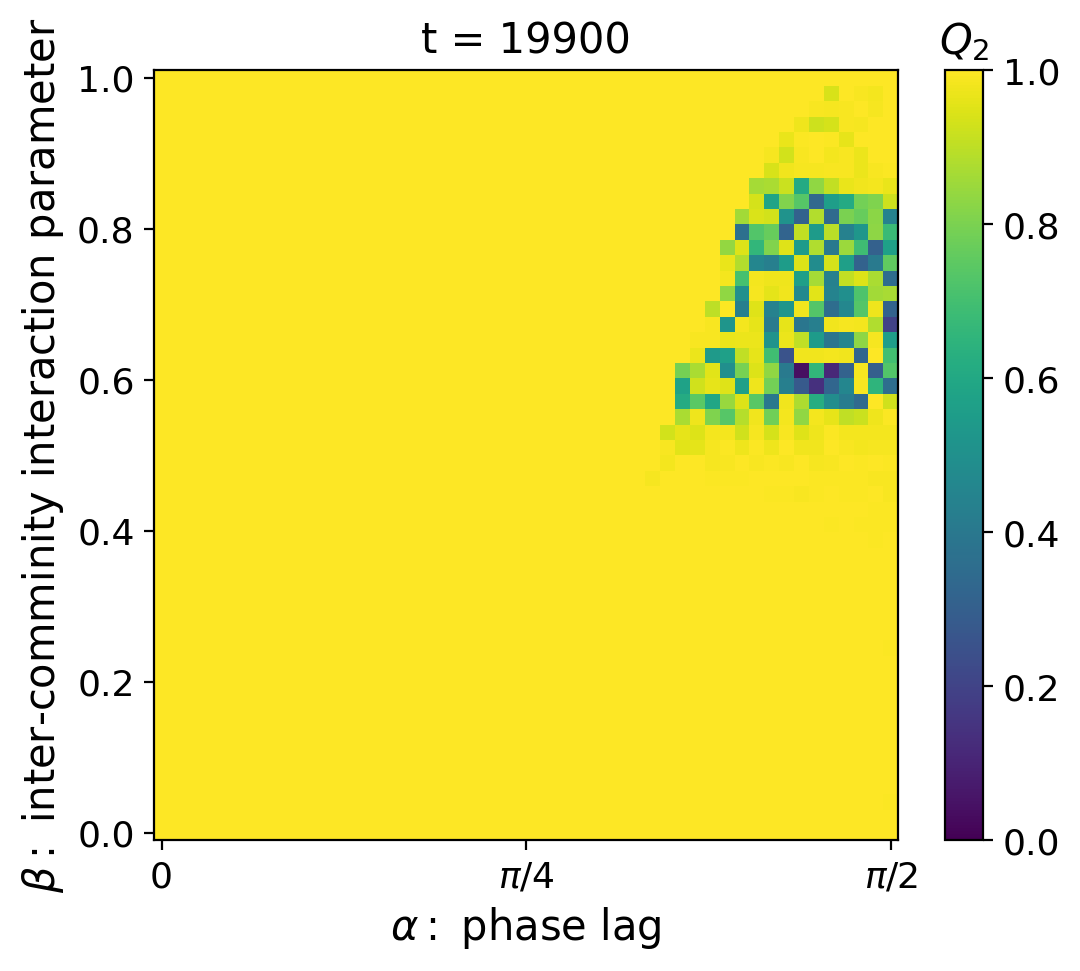

In [211]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,Q2s[:,:,index],vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)

cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$Q_2$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)

In [212]:
def get_ani(idx):
    im1.set_array(Q2s[:,:,idx])
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,100,1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/Simulation Q2 N = {N} Q2,eta1 = {eta1},eta2 = {eta2},shift = {shift/np.pi}pi,Q2_init = 0.1.mp4',dpi=300)

# OA2

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

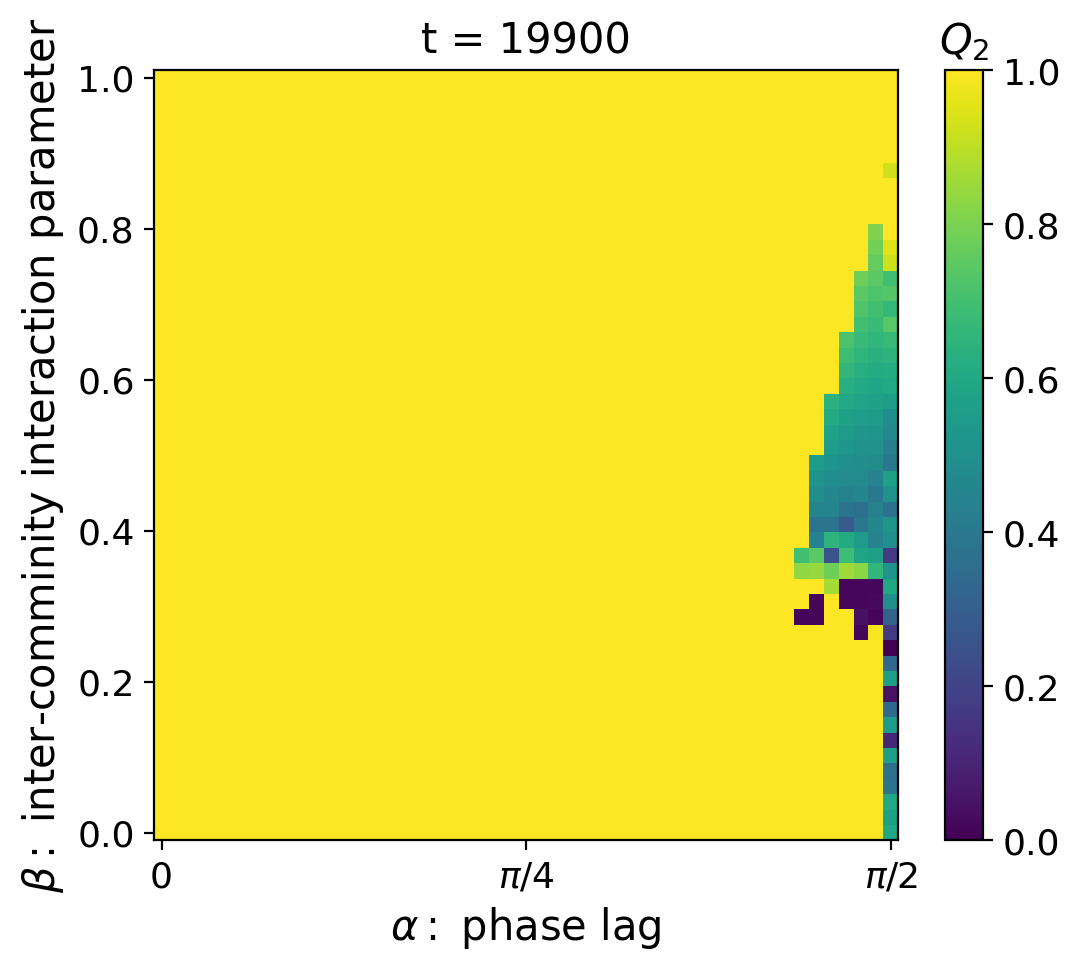

In [213]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,Q2s_OA2[:,:,index],vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)

cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$Q_2$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)

In [214]:
def get_ani(idx):
    im1.set_array(Q2s_OA2[:,:,idx])
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,100,1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/OA2 Q2,eta1 = {eta1},eta2 = {eta2},shift = {shift/np.pi}pi.mp4',dpi=300)

# OA1

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

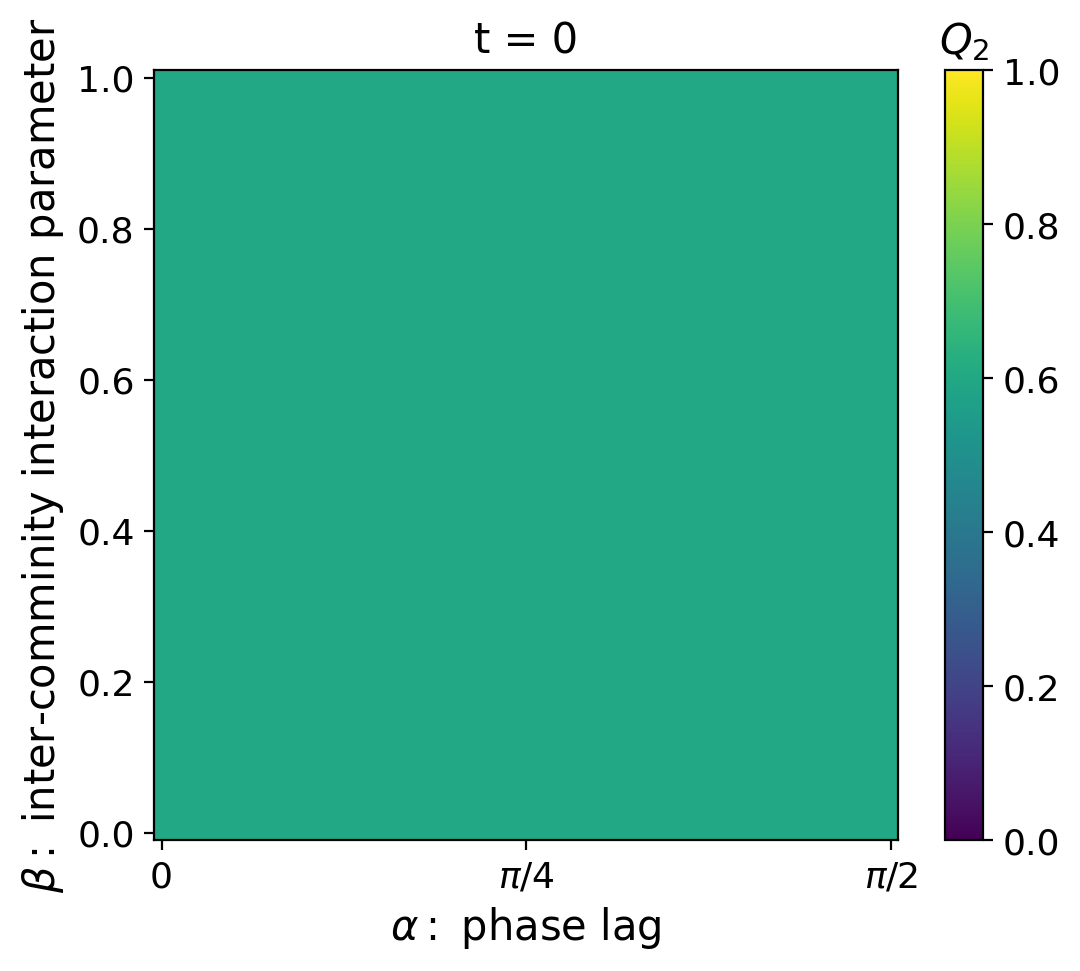

In [215]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = 0
im1 = ax1.pcolormesh(alphas,betas,Q2s_OA1[:,:,index],vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)

cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$Q_2$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)

In [216]:
def get_ani(idx):
    im1.set_array(Q2s_OA1[:,:,idx])
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,len(t_temp),1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/OA1 Q2,eta1 = {eta1},eta2 = {eta2},shift = {shift/np.pi}pi.mp4',dpi=300)

# diff simul OA2

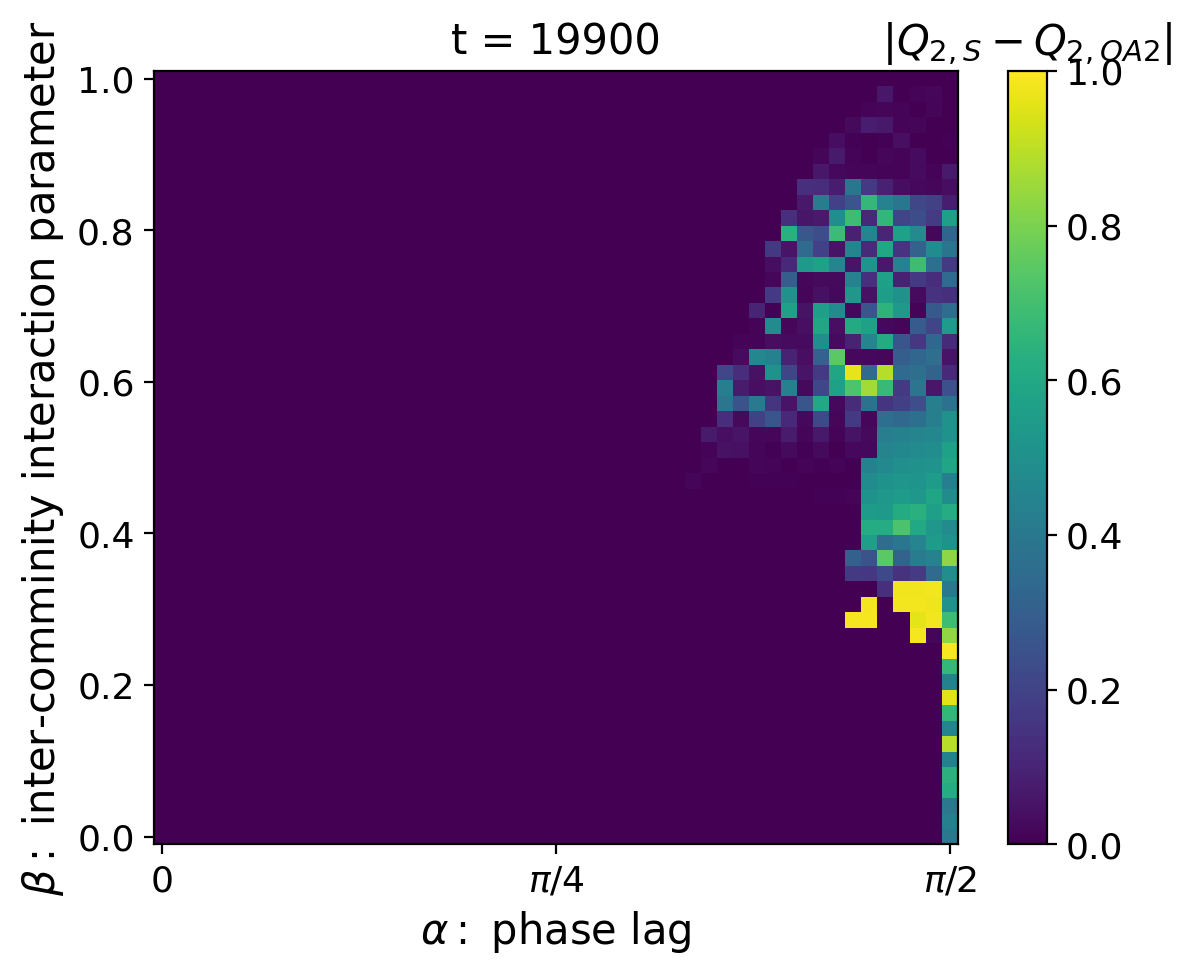

In [217]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,abs(Q2s[:,:,index] - Q2s_OA2[:,:,index]),vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)

cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$|Q_{2,S} - Q_{2,OA2}|$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

In [218]:
def get_ani(idx):
    im1.set_array(abs(Q2s[:,:,idx] - Q2s_OA2[:,:,idx]))
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,len(t_temp),1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/abs(Simul - OA2) Q2,eta1 = {eta1},eta2 = {eta2},shift = {shift/np.pi}pi.mp4',dpi=300)

# diff Simul - OA1

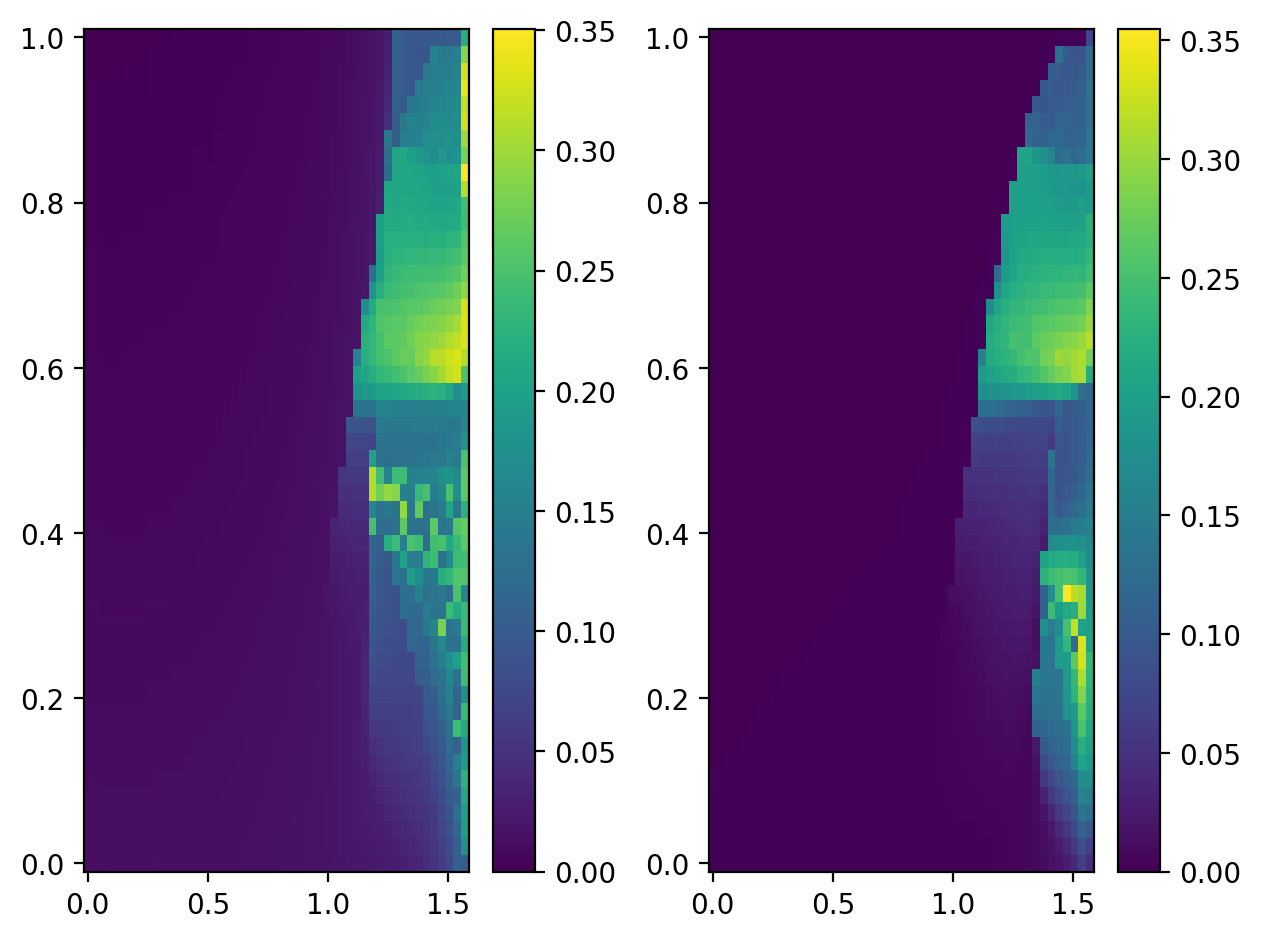

In [219]:
beta_idx = 9
# plt.subplot(211)
# for i in range(len(alphas)):
    # plt.plot(t[::1000],np.mean(Q2s[i,beta_idx,:] - Q2s_OA2[i,beta_idx,:]),1)
# plt.subplot(212)
DQ1 = np.std(Q2s[:,:,:] - Q2s_OA1[:,:,:],axis=2)
DQ2 = np.std(Q2s[:,:,:] - Q2s_OA2[:,:,:],axis=2)

plt.subplot(121)
plt.pcolormesh(alphas,betas,DQ1,vmin=0.0,)
plt.colorbar()
plt.subplot(122)
plt.pcolormesh(alphas,betas,DQ2,vmin=0.0,)
plt.colorbar()
plt.tight_layout()

# plt.plot(np.mean(Q2s[:,beta_idx,:] - Q2s_OA2[:,beta_idx,:],axis=1))
# plt.plot(np.mean(Q2s[:,beta_idx,:] - Q2s_OA1[:,beta_idx,:],axis=1))

# for i in range(len(alphas)):
#     plt.plot(t[::1000],abs(Q2s[i,beta_idx,:] - Q2s_OA1[i,beta_idx,:]))


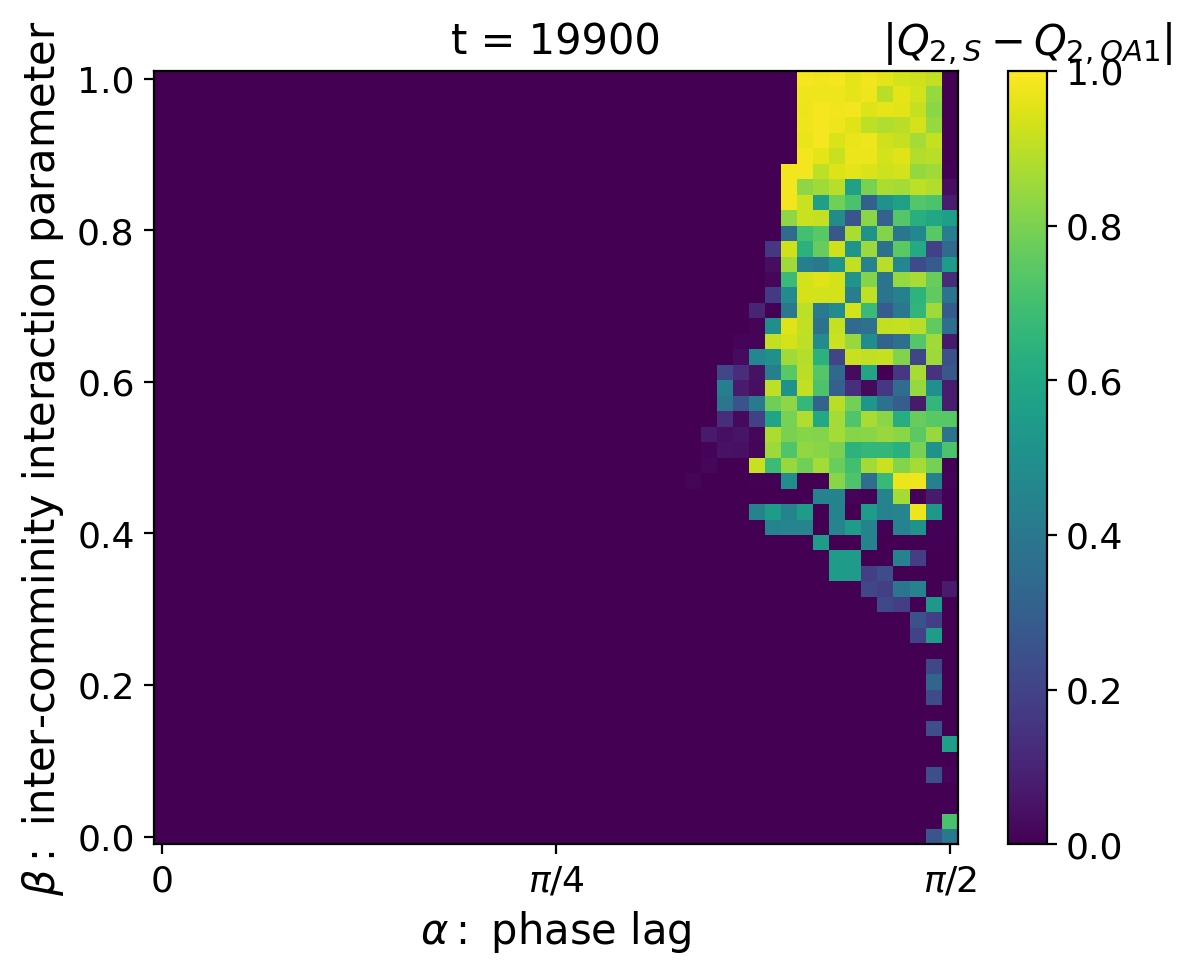

In [220]:
fig,(ax1) = plt.subplots(1,1,figsize=(6,5),dpi=100)

index = -1
im1 = ax1.pcolormesh(alphas,betas,abs(Q2s[:,:,index] - Q2s_OA1[:,:,index]),vmin=0.0, vmax=1)
ax1.set_aspect('auto')
text = ax1.set_title(rf't = {t_temp[index] :.0f}',fontsize=15)

cbar1 = fig.colorbar(im1,ax=ax1,shrink=1)
cbar1.ax.set_title(r'$|Q_{2,S} - Q_{2,OA1}|$',fontsize=15)
cbar1.ax.tick_params(labelsize=13)
plt.sca(ax1)
plt.xlabel(r'$\alpha:$ phase lag',fontsize = 15)
plt.ylabel(r'$\beta:$ inter-comminity interaction parameter',fontsize = 15)
plt.xticks([0,np.pi/4,np.pi/2],[0,'$\pi/4$','$\pi/2$'],fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()

In [221]:
def get_ani(idx):
    im1.set_array(abs(Q2s[:,:,idx] - Q2s_OA1[:,:,idx]))
    text.set_text(rf't = ${t_temp[idx] :.0f}$')

len(t)
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128
%config InlineBackend.figure_format = 'retina'
idxs=  np.arange(000,len(t_temp),1)
ani = FuncAnimation(fig,get_ani,frames=idxs,interval=50)
len(t)
# HTML(ani.to_jshtml())
ani.save(rf'HIGH ORDER CHIMERA/abs(Simul - OA1) Q2,eta1 = {eta1},eta2 = {eta2},shift = {shift/np.pi}pi.mp4',dpi=300)

In [ ]:
np.savez(f'OA1,eta1={eta1},eta2={eta2}',Q2s=Q2s_OA1,eta1=eta1,eta2=eta2)